In [1]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(".."))

c:\Users\asdf\OneDrive\TUM\ADLR\Project\tum-adlr-10\train.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:278.)
  state_tensor = torch.tensor(states, dtype=torch.float32)


Epoch 1/10, Loss: 0.232639
Epoch 2/10, Loss: 0.001646
Epoch 3/10, Loss: 0.000653
Epoch 4/10, Loss: 0.000207
Epoch 5/10, Loss: 0.000060
Epoch 6/10, Loss: 0.000024
Epoch 7/10, Loss: 0.000023
Epoch 8/10, Loss: 0.000034
Epoch 9/10, Loss: 0.000017
Epoch 10/10, Loss: 0.000021


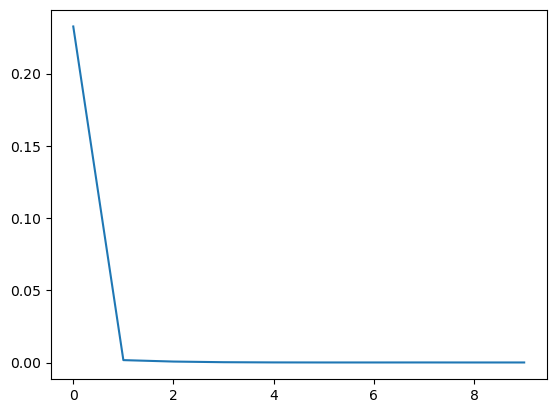

Model training completed successfully. Weights have been saved as 'baseline_model.pth' in the 'weights' directory.


In [2]:
from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv
from models.feedforward_nn import FeedforwardNN
from random_exploration import random_exploration
from train import create_dataloader, train_model

import torch
import os

env = MassSpringDamperEnv(nlin=True)

# Hyperparameters
NUM_TRAJECTORIES = 200
HORIZON = 500
BATCH_SIZE = 64
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3
HIDDEN_SIZE = 64

# Collect data from the environment
states, actions, next_states = random_exploration(env, NUM_TRAJECTORIES, HORIZON)

# Create DataLoader for training
dataloader = create_dataloader(states, actions, next_states, BATCH_SIZE)

# Initialize the dynamics model
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
model = FeedforwardNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE)

# Train the model
train_model(model, dataloader, NUM_EPOCHS, LEARNING_RATE)

# Ensure the 'weights' directory exists
os.makedirs('../weights', exist_ok=True)

# Save the trained model
torch.save(model.state_dict(), '../weights/baseline_model.pth')
print("Model training completed successfully. "
      "Weights have been saved as 'baseline_model.pth' in the 'weights' directory.")

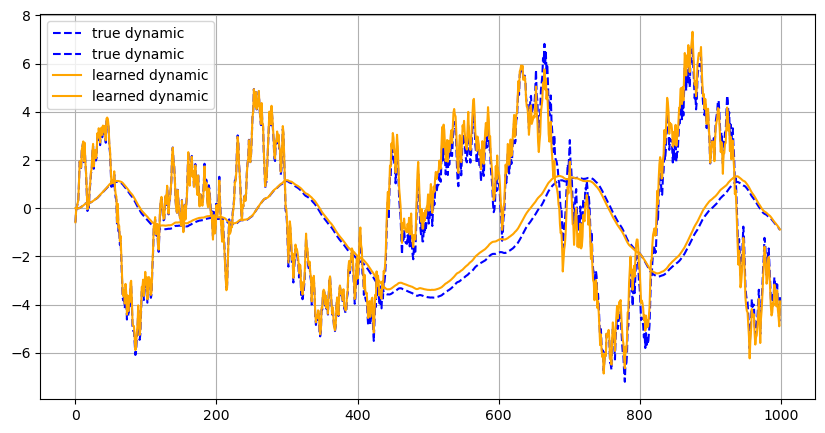

In [3]:
# test model
from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv

import numpy as np
import pygame
import matplotlib.pyplot as plt

# Using trained model as system dynamic
if __name__ == "__main__":
    # Initialize trained dynamics model
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    trained_model = FeedforwardNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE)

    # load saved weights
    trained_model.load_state_dict(torch.load('../weights/baseline_model.pth'))
    trained_model.eval()

    trained_env = MassSpringDamperEnv(model=trained_model)
    trained_env.reset()
    env.reset()
    save = [[],[]]
    # clock = pygame.time.Clock()
    for _ in range(1000):
        action = env.action_space.sample()
        obs, _, _, _, _= env.step(action)
        save[0].append(obs)
        obs, _, _, _, _= trained_env.step(action)
        save[1].append(obs)
        # clock.tick(400)

trained_env.close()
plt.figure(1, (10,5))
plt.plot(save[0], label="true dynamic", color="blue", linestyle="--")
plt.plot(save[1], label="learned dynamic", color="orange")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/10, Loss: 0.270935
Epoch 2/10, Loss: 0.001668
Epoch 3/10, Loss: 0.000621
Epoch 4/10, Loss: 0.000274
Epoch 5/10, Loss: 0.000116
Epoch 6/10, Loss: 0.000062
Epoch 7/10, Loss: 0.000047
Epoch 8/10, Loss: 0.000039
Epoch 9/10, Loss: 0.000040
Epoch 10/10, Loss: 0.000039


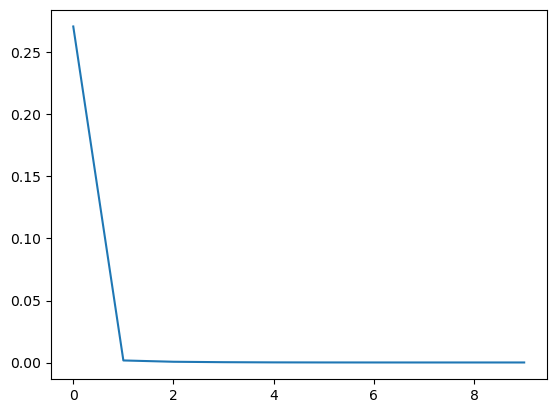

Model training completed successfully. Weights have been saved as 'baseline_model.pth' in the 'weights' directory.


In [4]:
from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv
from models.feedforward_nn import FeedforwardNN
from random_exploration import random_exploration
from train import create_dataloader, train_model

import torch
import os

env = MassSpringDamperEnv(nlin=True)

# Hyperparameters
NUM_TRAJECTORIES = 200
HORIZON = 500
BATCH_SIZE = 64
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3
HIDDEN_SIZE = 64

# Collect data from the environment
states, actions, next_states = random_exploration(env, NUM_TRAJECTORIES, HORIZON)

# Create DataLoader for training
dataloader = create_dataloader(states, actions, next_states, BATCH_SIZE)

# Initialize the dynamics model
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
model = FeedforwardNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE)

# Train the model
train_model(model, dataloader, NUM_EPOCHS, LEARNING_RATE)

# Ensure the 'weights' directory exists
os.makedirs('../weights', exist_ok=True)

# Save the trained model
torch.save(model.state_dict(), '../weights/baseline_model.pth')
print("Model training completed successfully. "
      "Weights have been saved as 'baseline_model.pth' in the 'weights' directory.")

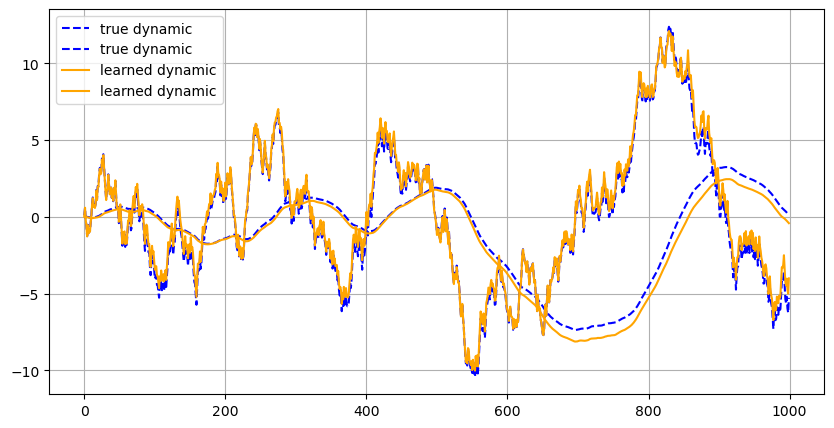

In [5]:
# test model
from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv

import numpy as np
import pygame
import matplotlib.pyplot as plt

# Using trained model as system dynamic
if __name__ == "__main__":
    # Initialize trained dynamics model
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    trained_model = FeedforwardNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE)

    # load saved weights
    trained_model.load_state_dict(torch.load('../weights/baseline_model.pth'))
    trained_model.eval()

    trained_env = MassSpringDamperEnv(model=trained_model)
    trained_env.reset()
    env.reset()
    save = [[],[]]
    # clock = pygame.time.Clock()
    for _ in range(1000):
        action = env.action_space.sample()
        obs, _, _, _, _= env.step(action)
        save[0].append(obs)
        obs, _, _, _, _= trained_env.step(action)
        save[1].append(obs)
        # clock.tick(400)

trained_env.close()
plt.figure(1, (10,5))
plt.plot(save[0], label="true dynamic", color="blue", linestyle="--")
plt.plot(save[1], label="learned dynamic", color="orange")
plt.legend()
plt.grid(True)
plt.show()